<a href="https://colab.research.google.com/github/Kumarkashish511/Deep_Learning/blob/main/Glass_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd

df = pd.read_csv("glass.csv")
print(df.shape)
print(df.columns)
df.head()

(214, 10)
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [23]:
df["y"] = (df["Type"] == 1).astype(int)
df = df.drop(columns=["Type"])


In [24]:
import numpy as np

X = df.drop(columns=["y"]).values
y = df["y"].values


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

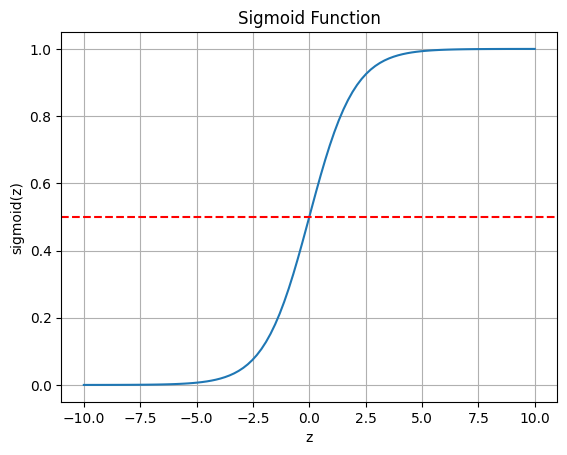

In [28]:
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.axhline(0.5, color='r', linestyle='--')
plt.show()

In [29]:
def predict_proba(X, w, b):
    z = X @ w + b
    p = sigmoid(z)
    return p

In [30]:
def loss(y, p):
    return -np.mean(y*np.log(p + 1e-9) + (1-y)*np.log(1-p + 1e-9))

In [31]:
def update_weights(X, y, w, b, lr):
    p = predict_proba(X, w, b)
    error = p - y

    w = w - lr * (X.T @ error) / len(y)
    b = b - lr * np.mean(error)

    return w, b

In [32]:
w = np.zeros(X_train.shape[1])
b = 0.0
lr = 0.1
epochs = 100

for i in range(epochs):
    w, b = update_weights(X_train, y_train, w, b, lr)

    if i % 10 == 0:
        p = predict_proba(X_train, w, b)
        print("Epoch", i, "Loss:", loss(y_train, p))

Epoch 0 Loss: 0.6821572814144314
Epoch 10 Loss: 0.6107403564917946
Epoch 20 Loss: 0.574788347949383
Epoch 30 Loss: 0.5528993998426993
Epoch 40 Loss: 0.5379208715556458
Epoch 50 Loss: 0.5269060274508053
Epoch 60 Loss: 0.5184063224566083
Epoch 70 Loss: 0.5116157361449429
Epoch 80 Loss: 0.5060453153729171
Epoch 90 Loss: 0.501379430005224


In [33]:
def predict_label(p, threshold=0.5):
    return (p >= threshold).astype(int)

In [34]:
p_test = predict_proba(X_test, w, b)

y_pred_05 = predict_label(p_test, 0.5)
y_pred_07 = predict_label(p_test, 0.7)

print(y_pred_05)
print(y_pred_07)

[0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0]


In [36]:
y_pred_05 = predict_label(p_test, threshold=0.5)
accuracy_05 = np.mean(y_pred_05 == y_test)
print(f"Accuracy (threshold=0.5): {accuracy_05:.4f}")

Accuracy (threshold=0.5): 0.8605


In [37]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix (threshold=0.5):")
print(confusion_matrix(y_test, y_pred_05))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_05))

Confusion Matrix (threshold=0.5):
[[30  2]
 [ 4  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.78      0.64      0.70        11

    accuracy                           0.86        43
   macro avg       0.83      0.79      0.80        43
weighted avg       0.86      0.86      0.86        43



In [38]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
sklearn_acc = clf.score(X_test, y_test)
print(f"Sklearn Accuracy: {sklearn_acc:.4f}")
print(f"Our Accuracy: {accuracy_05:.4f}")

Sklearn Accuracy: 0.8372
Our Accuracy: 0.8605


## Using a stricter decision threshold in glass quality control is considered safer because the cost of mistakenly approving defective or incorrect glass (a false positive) can be extremely high, leading to safety hazards and financial damage. A higher threshold ensures that the model labels glass as “acceptable” only when it has strong confidence in the prediction. While this approach may result in more false negatives—meaning some good glass may be rejected—it is generally safer in industrial settings to discard uncertain samples rather than risk approving faulty ones.


## Logistic regression is different from the perceptron because it estimates probabilities instead of making rigid yes/no decisions. The perceptron relies on a step function that directly assigns a class label, whereas logistic regression applies the sigmoid function to produce outputs between 0 and 1, reflecting the likelihood of belonging to a class. This probabilistic output allows the use of cross-entropy loss, which evaluates how far a prediction is from the true label, rather than simply checking correctness. The sigmoid function is crucial because it is continuous and differentiable, making gradient-based optimization possible and enabling the model to express prediction confidence. However, logistic regression still has drawbacks: it can only form linear decision boundaries, struggles with complex non-linear patterns unless features are engineered, and can be affected by noisy data or outliers.
